# Final Project 2 - Logistic Regression dan SVM

## Kelompok 2

## Import Pustaka

In [20]:
import numpy as np 
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# import library untuk model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# splitting data
from sklearn.model_selection import train_test_split 

# eval model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score # import library mendapatkan accuracy score
from sklearn.metrics import confusion_matrix # import library confussion matrix
from sklearn.metrics import classification_report # import library classification report


import warnings # ignore the warning
warnings.filterwarnings('ignore')

## Data Loading

In [21]:
data = pd.read_csv("../Datasets/weatherAUS.csv")
df = data.copy()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Melihat dimensi dari kumpulan data menggunakan *shape* 

In [22]:
df.shape

(145460, 23)

Dapat dilihat bahwa ada **145.460 baris** dan **23 kolom** dalam kumpulan data Rain in Australia. 

Pratinjau kumpulan data 5 baris teratas menggunakan `head()`.

In [23]:
pd.set_option('display.max_columns', None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Melihat kolom dalam kumpulan data menggunakan `df.columns`.

In [24]:
col_names = df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Melihat ringkasan dataset menggunakan `info()`.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dapat dilihat pada info di atas, bahwa dataset berisi campuran variabel **kategori** dan **numerik**. Terdapat **7 Variabel kategori** yang memiliki tipe data `objek` dan terdapat **16 Variabel numerik** memiliki tipe data `float64`.
Lalu, pada beberapa kolom ada yang memiliki nilai null.  
Melihat properti statistik dari variabel numerik dengan `describe()`.

In [26]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Data Cleaning

Memeriksa missing values semua kolom.

In [27]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Ada beberapa kolom yang memiliki nilai missing values, untuk lebih jelasnya dapat kita visualisasikan dengan grafik di bawah ini.

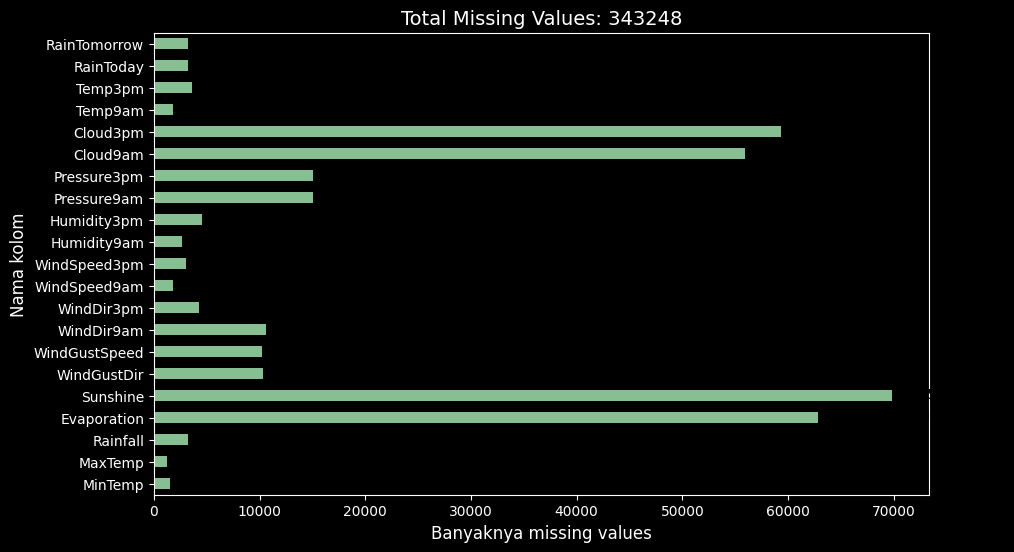

In [28]:
# Menghitung jumlah missing values pada setiap kolom
missing_values = df.isnull().sum()

# Memfilter kolom yang memiliki missing values
missing_values = missing_values[missing_values > 0]

# Menghitung total jumlah missing values
total_missing = missing_values.sum()

# Menghitung persentase missing values pada setiap kolom
percent_missing = round(missing_values/len(df)*100,2)

# Membuat bar chart
ax = missing_values.plot(kind='barh', figsize=(10, 6), color='#86bf91')

# Menambahkan label pada setiap bar chart
for i, v in enumerate(missing_values):
    ax.text(v + 3, i - 0.1, str(v) + ' (' + str(percent_missing[i]) + '%)', color='black', fontsize=10)

# Menambahkan judul dan label pada chart
plt.title('Total Missing Values: '+ str(total_missing), fontsize=14)
plt.xlabel('Banyaknya missing values', fontsize=12)
plt.ylabel('Nama kolom', fontsize=12)

# Menampilkan chart
plt.show()

Dapat disimpulkan dari grafik di atas. Ada **4 kolom** yang memiliki banyak missing values, yakni `Cloud3pm`, `Cloud9am`, `Sunshine`, dan `Evaporation`.  
Menghapus kolom date menggunakan `drop()` karena tidak diperlukan dalam memprediksi variabel `RainTomorrow`.

In [29]:
df.drop(columns='Date', inplace=True)

Menangani missing values pada kolom kategori, tetapi sebelum itu kita perlu mencari tau kolom mana saja yang termasuk kolom kategori.

In [30]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Kolom kategori :', categorical)

Kolom kategori : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Mengubah tipe data object menjadi category sesuai dengan informasi dari setiap kolom menggunakan `astype()`.

In [31]:
df[['Location','WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']] = df[['Location','WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']].astype('category')

Menghapus baris missing values untuk kolom `RainToday` dan `RainTomorrow`. 

In [32]:
df_clean = df.dropna(subset=['RainToday', 'RainTomorrow'], axis = 0)

Untuk kolom kategori `WindGustDir, WindDir9am,` dan `WindDir3pm` kita akan mengganti missing values menggunakan nilai mode/modus.

In [33]:
df_clean['WindGustDir'].fillna(df_clean['WindGustDir'].mode()[0], inplace=True)
df_clean['WindDir9am'].fillna(df_clean['WindDir9am'].mode()[0], inplace=True)
df_clean['WindDir3pm'].fillna(df_clean['WindDir3pm'].mode()[0], inplace=True)

Memeriksa kembali untuk memastikan missing values pada kolom kategori sudah tidak ada.

In [34]:
df_clean[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

Setelah menangani missing values pada kolom kategori. Selanjutnya, menangani missing values pada kolom numerik, tetapi sebelum itu kita perlu mencari tau kolom mana saja yang termasuk kolom numerik.

In [35]:
numerical = [var for var in df.columns if df[var].dtype == 'float64']

print('Kolom numerik :', numerical)

Kolom numerik : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Untuk mengganti missing values pada setiap kolom/fitur kita perlu melihat visualisasi data box plot atau hist plot untuk menentukan data tersebut diganti dengan mean atau median.

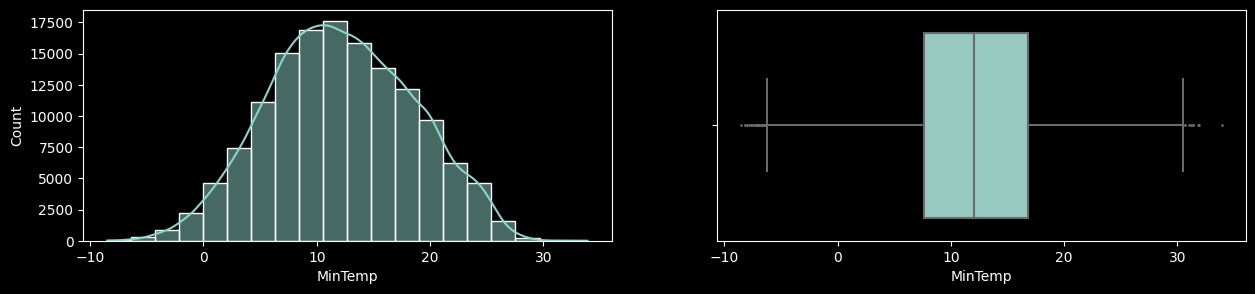

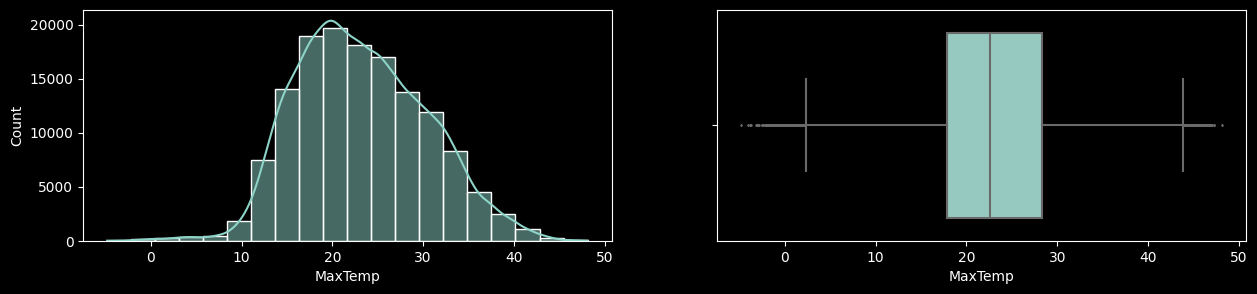

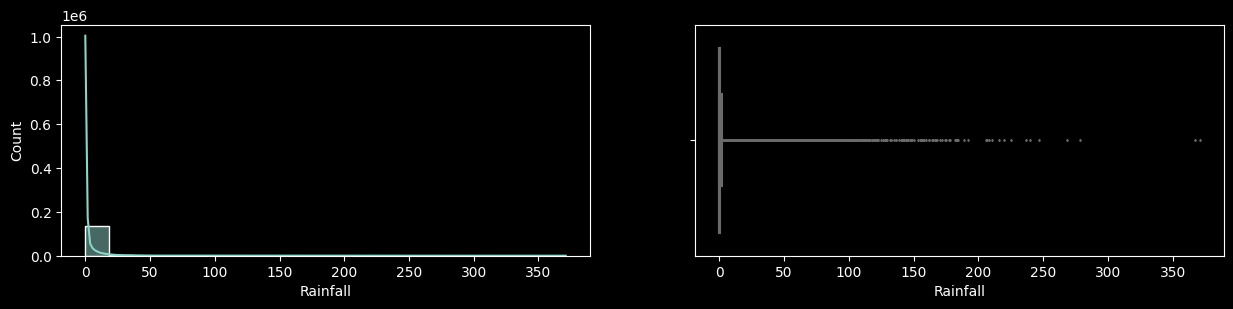

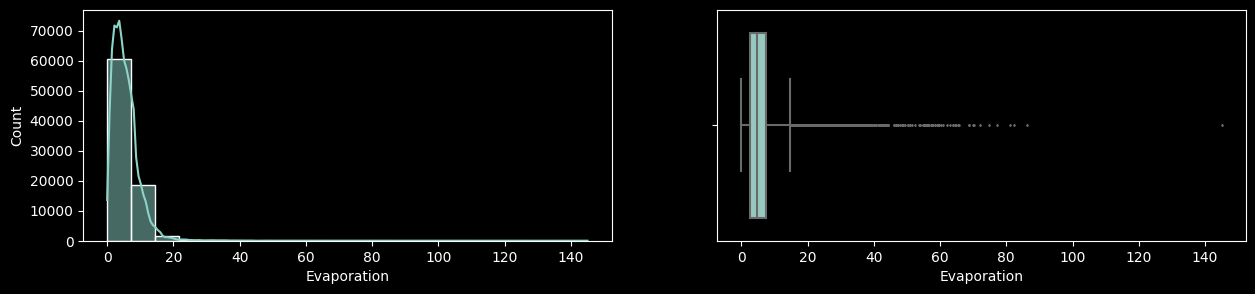

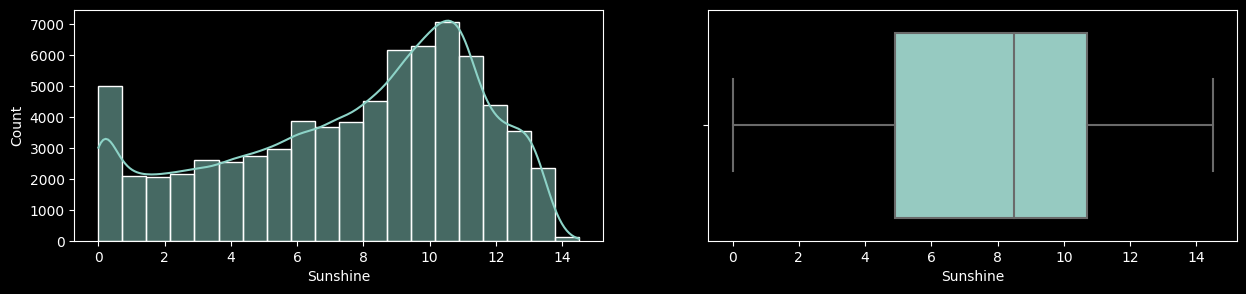

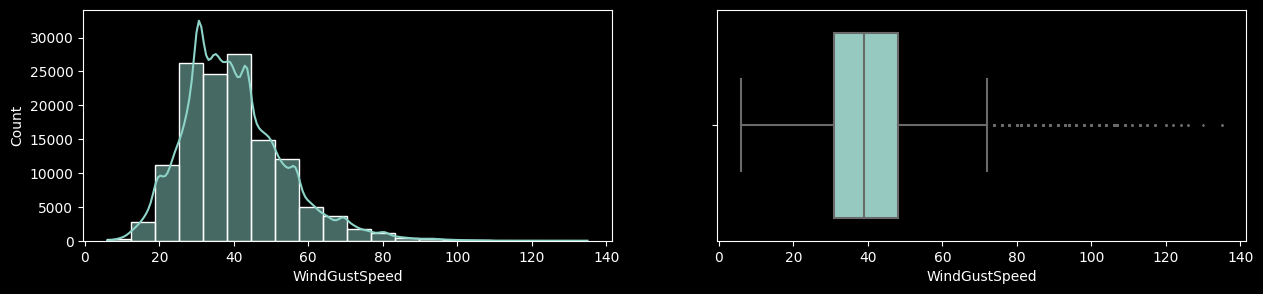

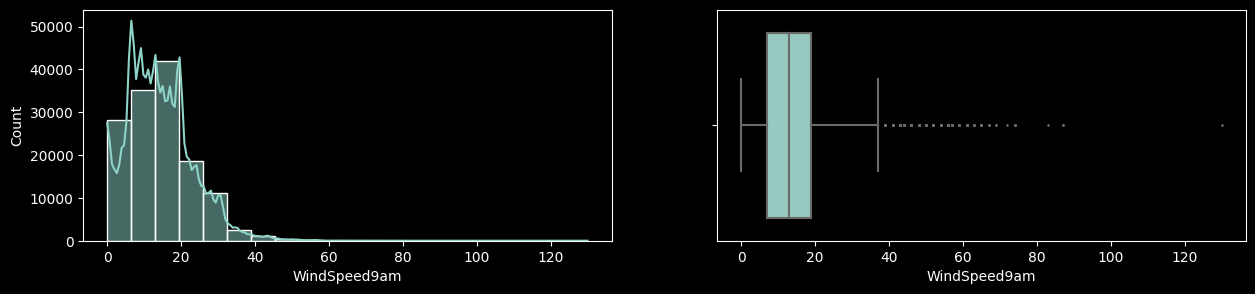

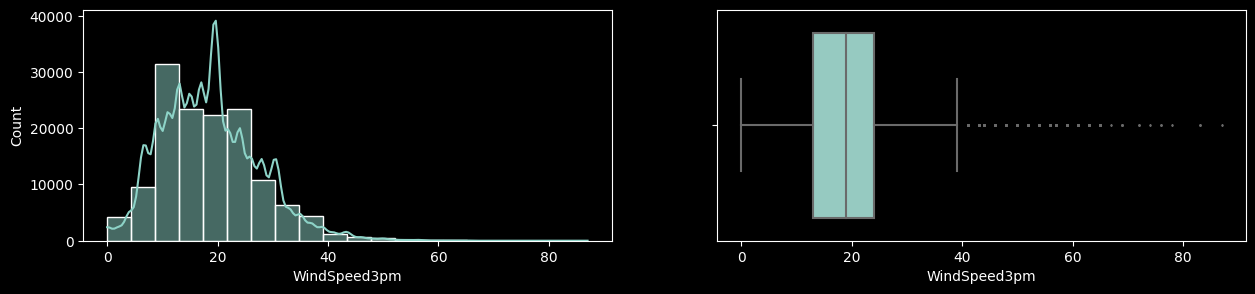

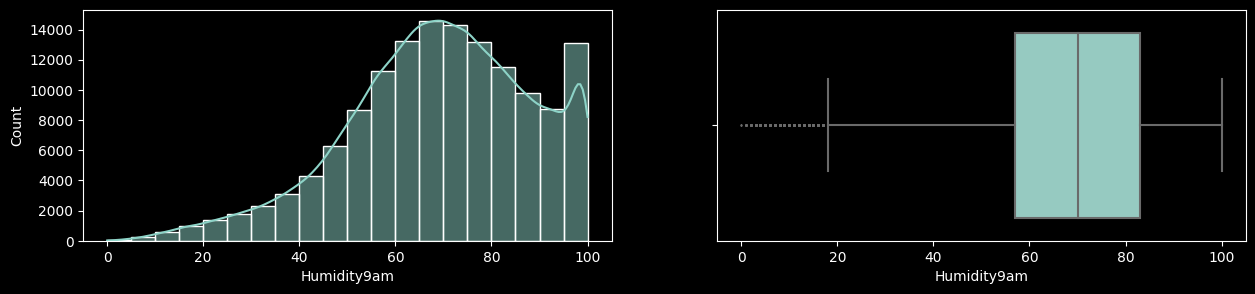

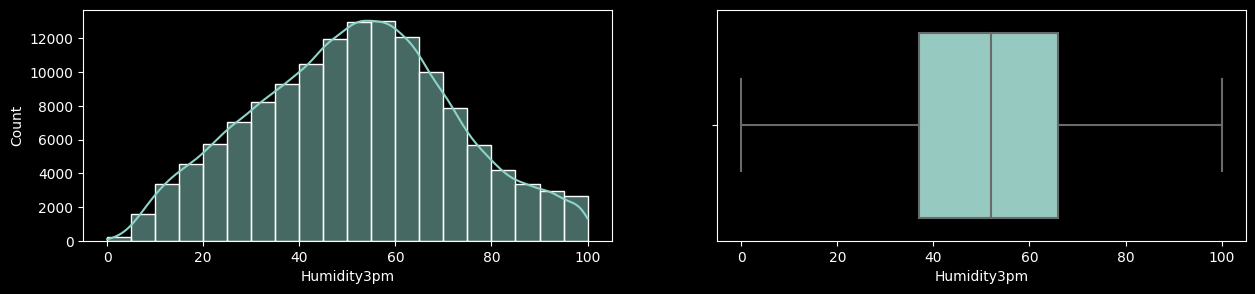

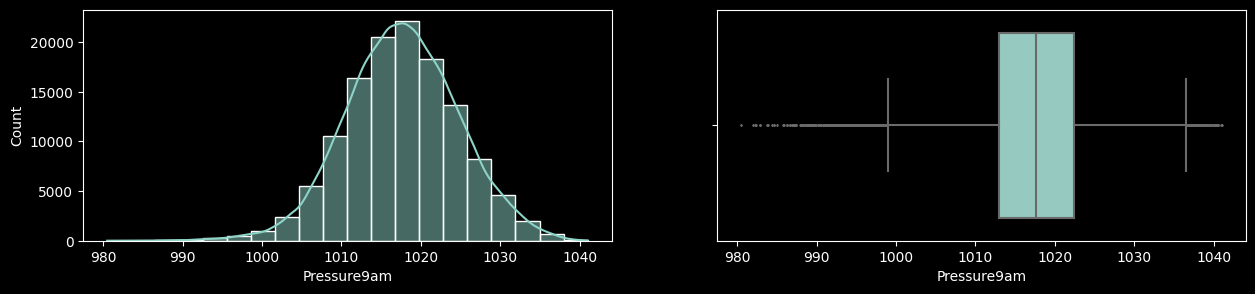

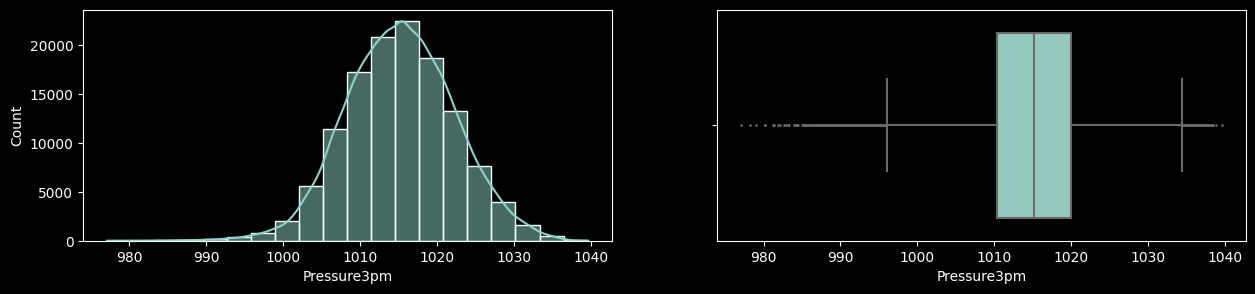

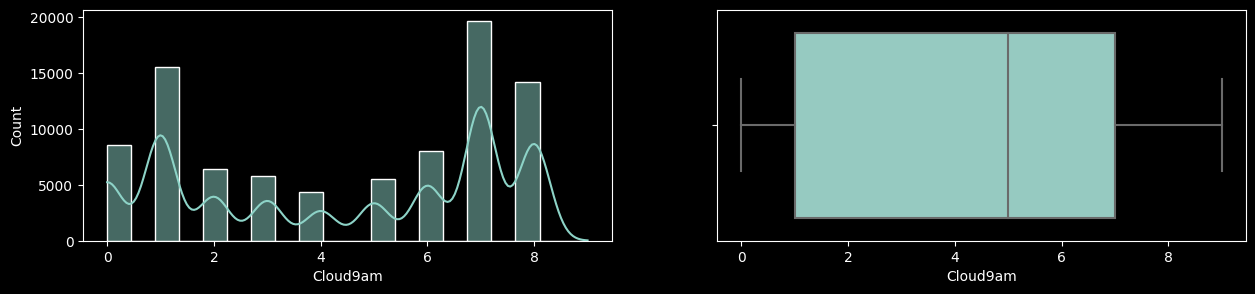

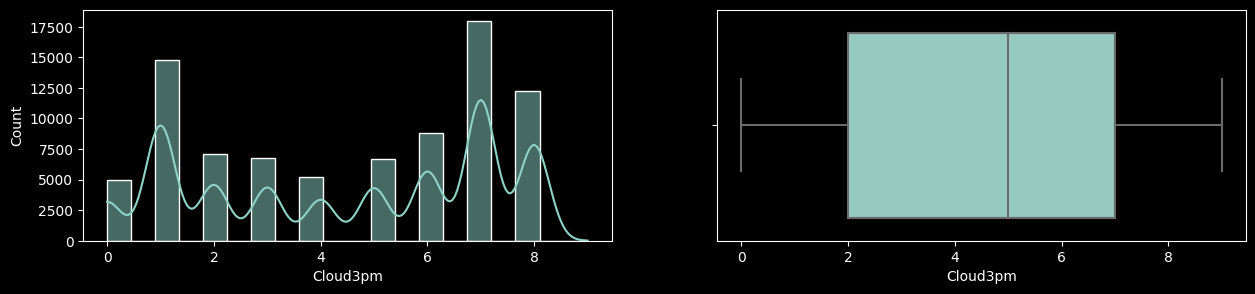

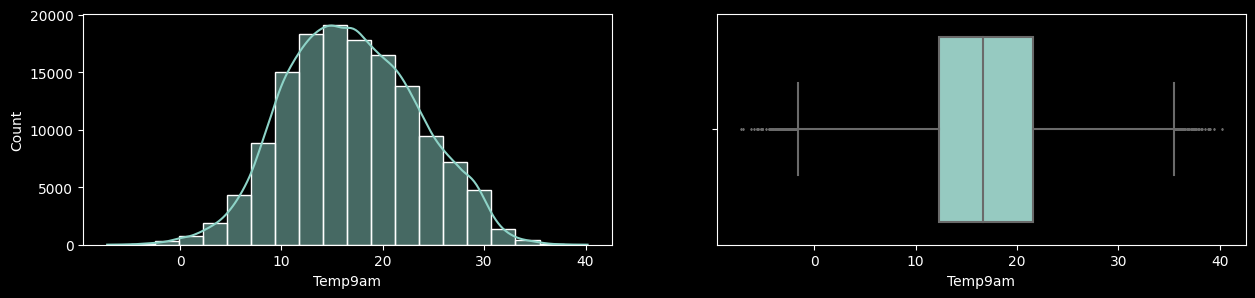

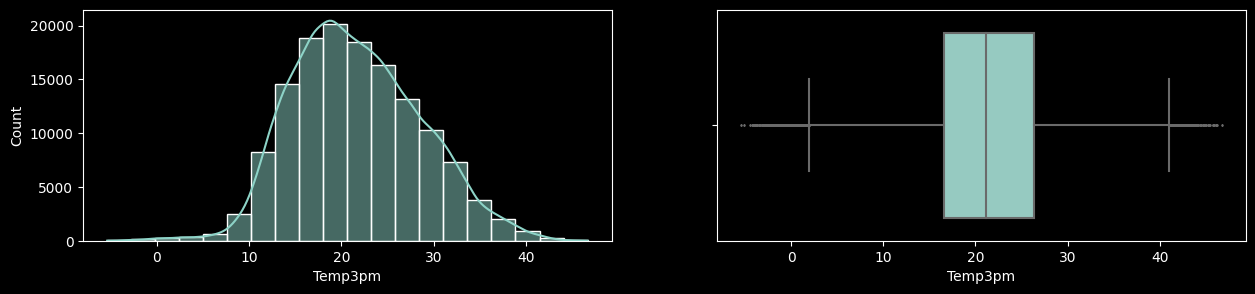

In [36]:
for i in numerical:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df_clean[i],bins=20, kde=True,ax=axs[0])
    sns.boxplot(data = df_clean[i], x = df_clean[i], ax = axs[1], fliersize=1)

Berdasarkan visualisasi data di atas, kita perlu menghapus kolom/fitur `Rainfall` karena terlalu banyak outliers.

In [37]:
df_clean.drop(columns='Rainfall', inplace=True)

Setelah menghapus kolom `Rainfall`. Selanjutnya, mengisi missing values pada masing-masing kolom.

In [38]:
# Replace missing values

df_clean['MinTemp'].fillna(df_clean['MinTemp'].median(), inplace=True)
df_clean['MaxTemp'].fillna(df_clean['MaxTemp'].median(), inplace=True)
df_clean['Evaporation'].fillna(df_clean['Evaporation'].median(), inplace=True)
df_clean['Sunshine'].fillna(df_clean['Sunshine'].median(), inplace=True)
df_clean['WindGustSpeed'].fillna(df_clean['WindGustSpeed'].median(), inplace=True)
df_clean['WindSpeed9am'].fillna(df_clean['WindSpeed9am'].median(), inplace=True)
df_clean['WindSpeed3pm'].fillna(df_clean['WindSpeed3pm'].median(), inplace=True)
df_clean['Humidity9am'].fillna(df_clean['Humidity9am'].median(), inplace=True)
df_clean['Humidity3pm'].fillna(df_clean['Humidity3pm'].median(), inplace=True)
df_clean['Pressure9am'].fillna(df_clean['Pressure9am'].median(), inplace=True)
df_clean['Pressure3pm'].fillna(df_clean['Pressure3pm'].median(), inplace=True)
df_clean['Cloud9am'].fillna(df_clean['Cloud9am'].median(), inplace=True)
df_clean['Cloud3pm'].fillna(df_clean['Cloud3pm'].median(), inplace=True)
df_clean['Temp9am'].fillna(df_clean['Temp9am'].median(), inplace=True)
df_clean['Temp3pm'].fillna(df_clean['Temp3pm'].median(), inplace=True)

Memeriksa nilai duplikat.

In [39]:
df_clean.duplicated().sum()

46

Menghapus data duplikat.

In [40]:
df_clean.drop_duplicates(keep=False, inplace=True)
print('Jumlah data duplikat', df_clean.duplicated().sum())

Jumlah data duplikat 0


Memeriksa missing values.

In [41]:
df_clean.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Explorasi Data

Visualisasi data kolom `RainTomorrow`.

In [42]:
df_clean['RainTomorrow'].value_counts()

No     109532
Yes     31199
Name: RainTomorrow, dtype: int64

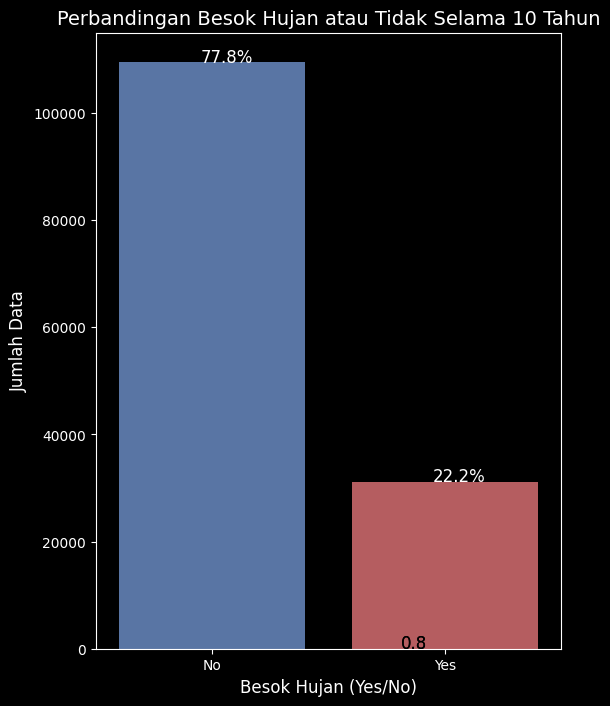

In [43]:
# Membuat count plot
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df_clean, palette=["#4C72B0","#C44E52"])

# Menambahkan label pada sumbu x dan y
plt.xlabel('Besok Hujan (Yes/No)', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)

# Menambahkan persentase tiap kategori pada setiap bar chart
total = len(df_clean['RainTomorrow'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.2
    ax.annotate(percentage, (x, y), size = 12)

# Menambahkan garis horizontal pada setiap bar chart
for i in ax.patches:
    ax.text(i.get_width()+0.01, i.get_y()+0.3, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')

# Menambahkan judul pada chart
plt.title('Perbandingan Besok Hujan atau Tidak Selama 10 Tahun', fontsize=14)

# Menampilkan chart
plt.show()


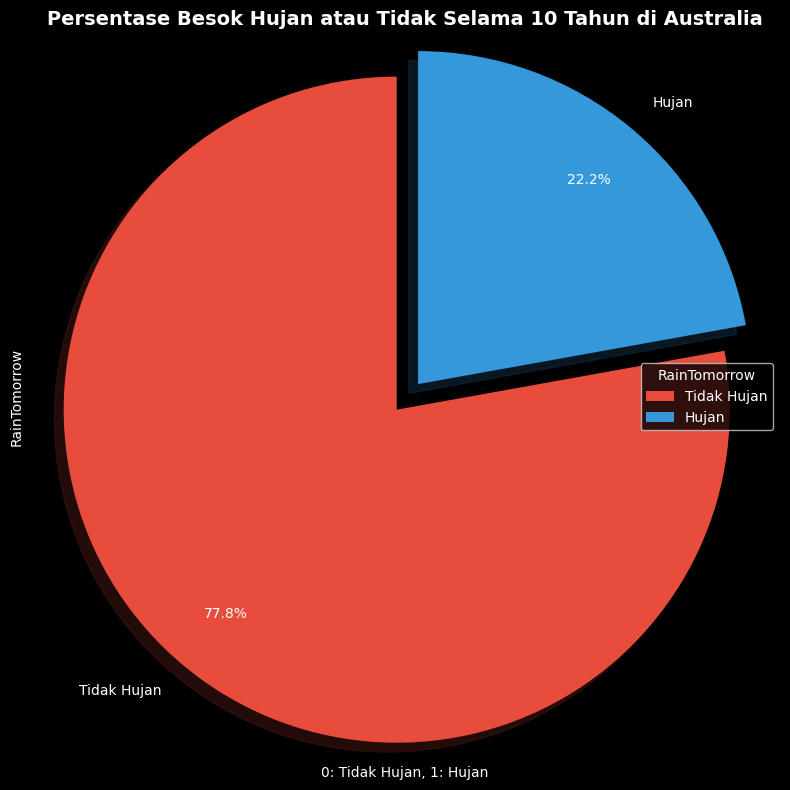

In [44]:
# Definisikan warna dan pengaturan explode
colors_list = ['#e74c3c', '#3498db']
explode_list = [0, 0.1]

# Membuat pie chart
df_clean['RainTomorrow'].value_counts().plot(kind='pie',                            
                            figsize=(8, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=['Tidak Hujan', 'Hujan'],         # turn on labels on pie chart
                            pctdistance=0.8,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# Menambahkan judul pada chart
plt.title('Persentase Besok Hujan atau Tidak Selama 10 Tahun di Australia', fontsize=14, fontweight='bold') 

# Menambahkan labels pada chart
plt.xlabel('0: Tidak Hujan, 1: Hujan')

# Mengubah ukuran pie chart agar lebih mudah dibaca
plt.axis('equal')
plt.tight_layout()

# Menambahkan legend pada chart
plt.legend(title='RainTomorrow', labels=['Tidak Hujan', 'Hujan'], bbox_to_anchor=(1, 0.5), loc='center right')

# Menampilkan chart
plt.show()

Visualisasi data `Lokasi` dengan rata-rata `MinTemp` dan `MaxTemp` menggunakan Bar plot

In [45]:
loctemp = df_clean.groupby("Location")[["MinTemp", "MaxTemp"]].mean().round()
loctemp = loctemp.reset_index()
loctemp.columns= ["Location","MinTemp", "MaxTemp"]
fig = px.bar(loctemp, x="Location", y=["MinTemp", "MaxTemp"], title="Lokasi di Australia dengan rata-rata suhu minimum dan suhu maksimum")
fig.show()

Visualisasi data `RainToday` di Australia pada tiap lokasi.

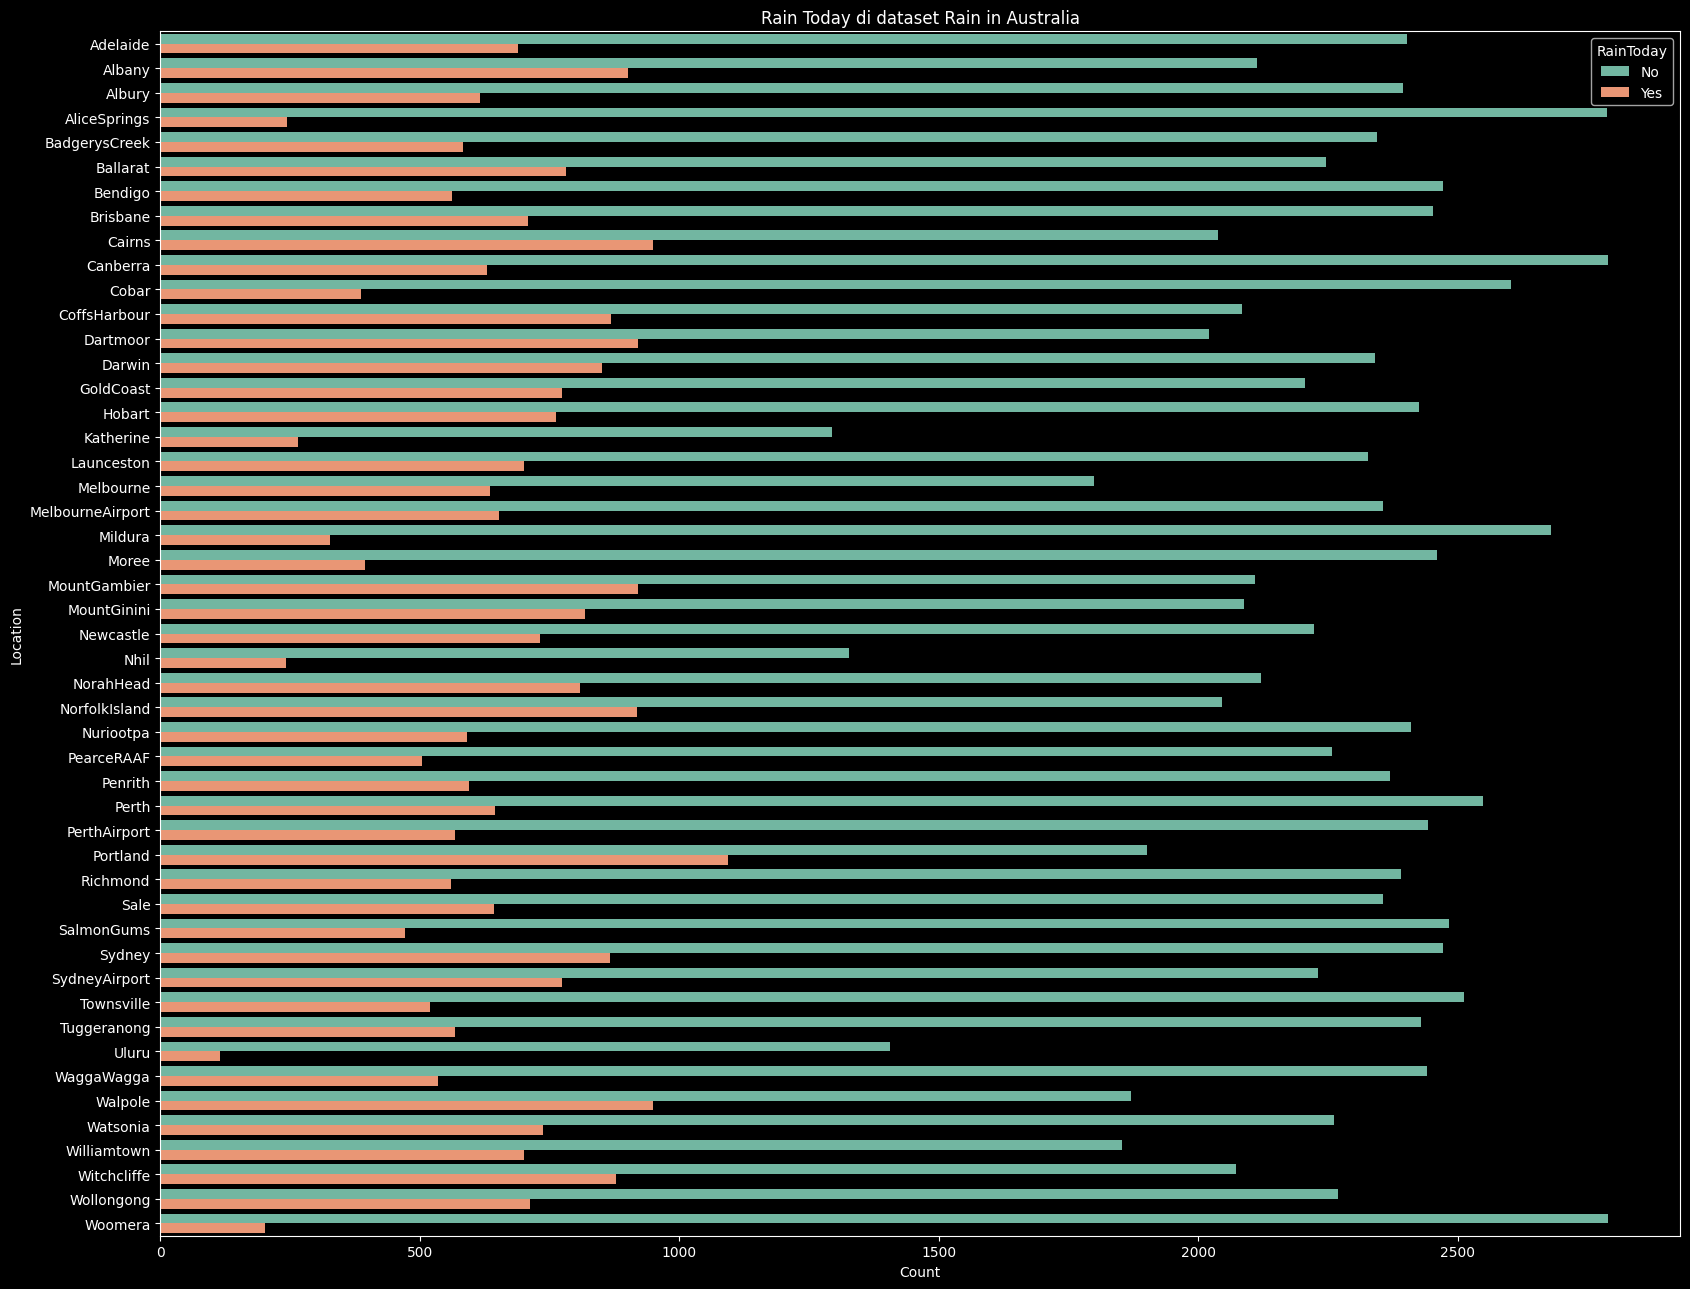

In [46]:
plt.figure(figsize=(17,13))
sns.countplot(data=df, y='Location', hue="RainToday", palette=sns.color_palette("Set2"))

plt.title('Rain Today di dataset Rain in Australia')
plt.xlabel('Count')
plt.ylabel('Location')
plt.tight_layout()

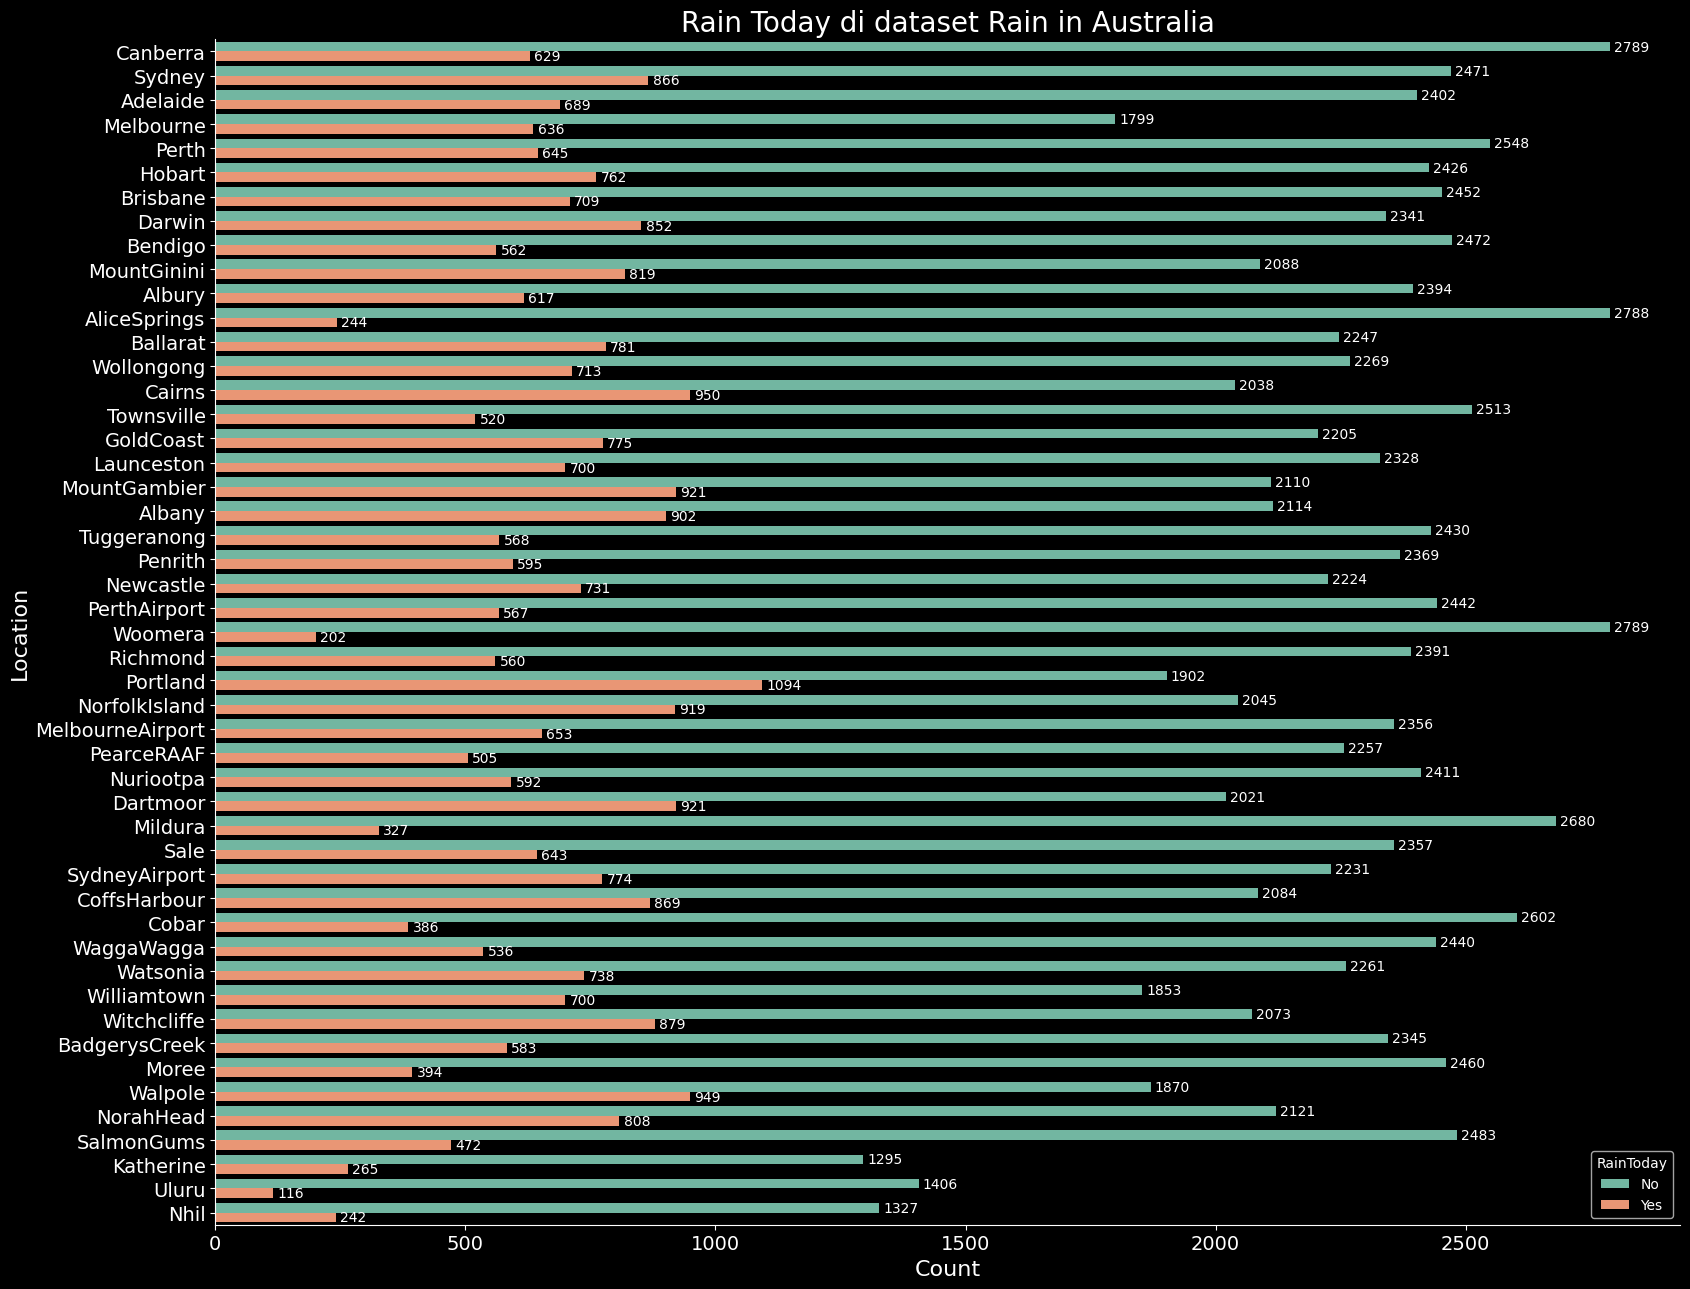

In [47]:

# Mengurutkan data berdasarkan jumlah data secara menurun
location_count = df['Location'].value_counts().sort_values(ascending=False)

# Menambahkan anotasi nilai pada setiap bar chart
fig, ax = plt.subplots(figsize=(17,13))
sns.countplot(data=df, y='Location', hue="RainToday", order=location_count.index, palette="Set2")

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{int(width)}', (width, y+height/2), xytext=(3, 0), textcoords="offset points", va='center')

# Mengubah warna chart
sns.set_palette("Set2")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mengatur label dan ukuran chart
plt.title('Rain Today di dataset Rain in Australia', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Location', fontsize=16)
plt.tick_params(labelsize=14)
plt.tight_layout()

# Menampilkan chart
plt.show()

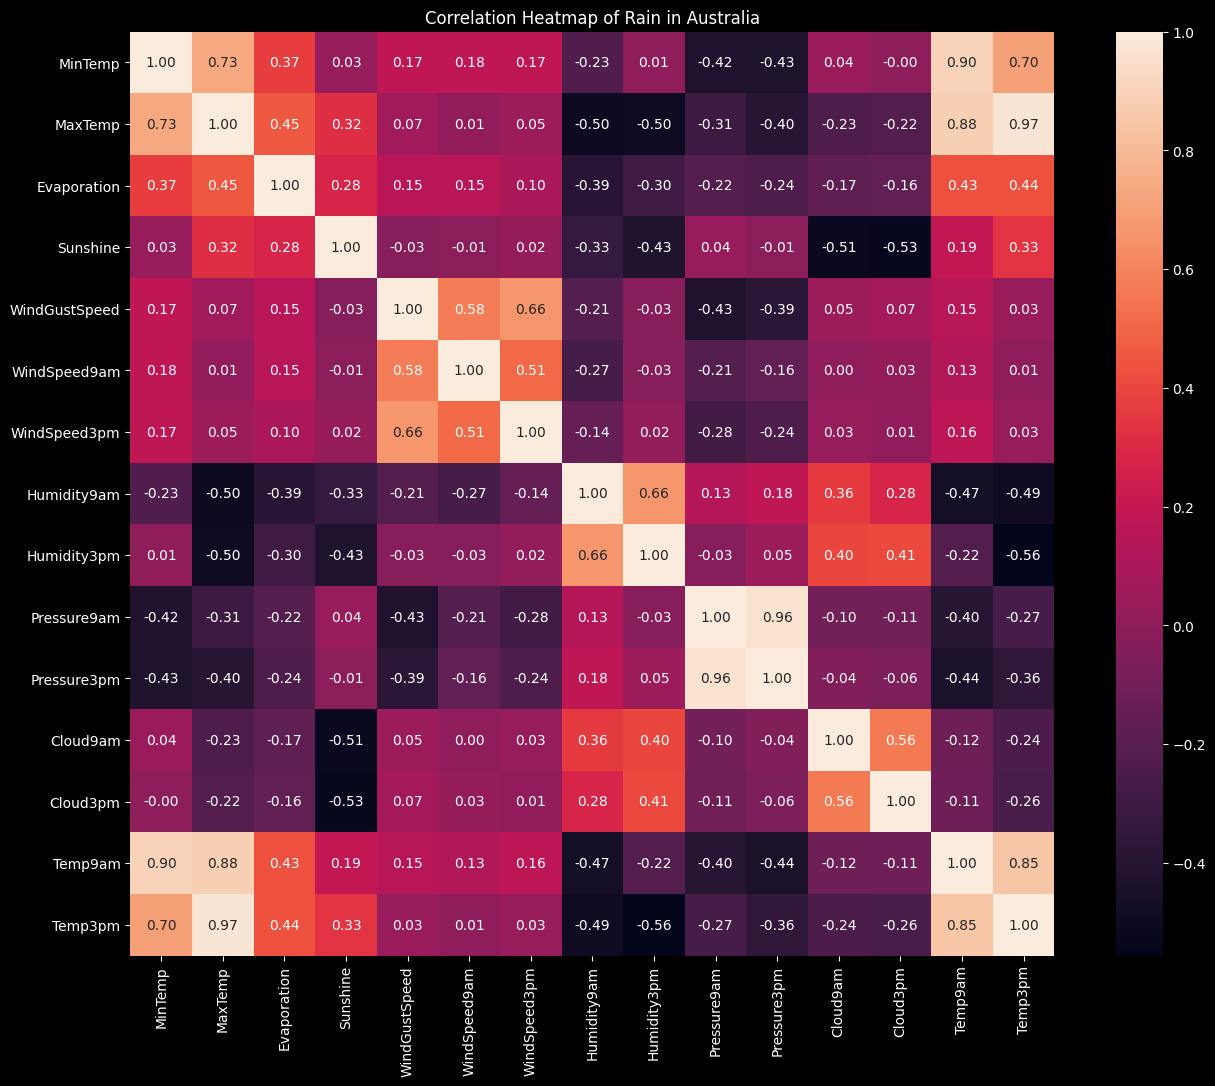

In [48]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia')
ax = sns.heatmap(df_clean.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels())           
plt.show()

Dari heatmap korelasi di atas, dapat disimpulkan bahwa :
- Variabel MinTemp dan MaxTemp berkorelasi sangat positif (koefisien korelasi = 0,73).
- Variabel MinTemp dan Temp3pm berkorelasi sangat positif (koefisien korelasi = 0,70).
- Variabel MinTemp dan Temp9am berkorelasi sangat positif (koefisien korelasi = 0,90).
- Variabel MaxTemp dan Temp3pm berkorelasi positif kuat (koefisien korelasi = 0,97).
- Variabel MaxTemp dan Temp9am berkorelasi sangat positif (koefisien korelasi = 0,88).
- Variabel Pressure9am dan Pressure3pm berkorelasi sangat positif (koefisien korelasi = 0,96).
- Variabel Temp9am dan Temp3pm berkorelasi sangat positif (koefisien korelasi = 0,85).  

In [49]:
df_clean['RainTomorrow'] = df_clean['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_clean['RainToday'] = df_clean['RainToday'].map({'Yes': 1, 'No': 0})

## Data Preprocessing

Berbagai machine learning algoritma memerlukan data input numerik, jadi kita perlu merepresentasikan kolom kategorikal dalam kolom numerik. Berdasarkan `df.info()` ada 6 kolom yang berkategori objek dan harus kita ubah menjadi kolom numerik.

In [50]:
le = preprocessing.LabelEncoder()

df_categorical= df_clean.select_dtypes(include='category')
df_encoded = df_clean.copy()

for column in df_categorical.columns:
    df_encoded[column] = le.fit_transform(df_clean[column])

**Features Selection**

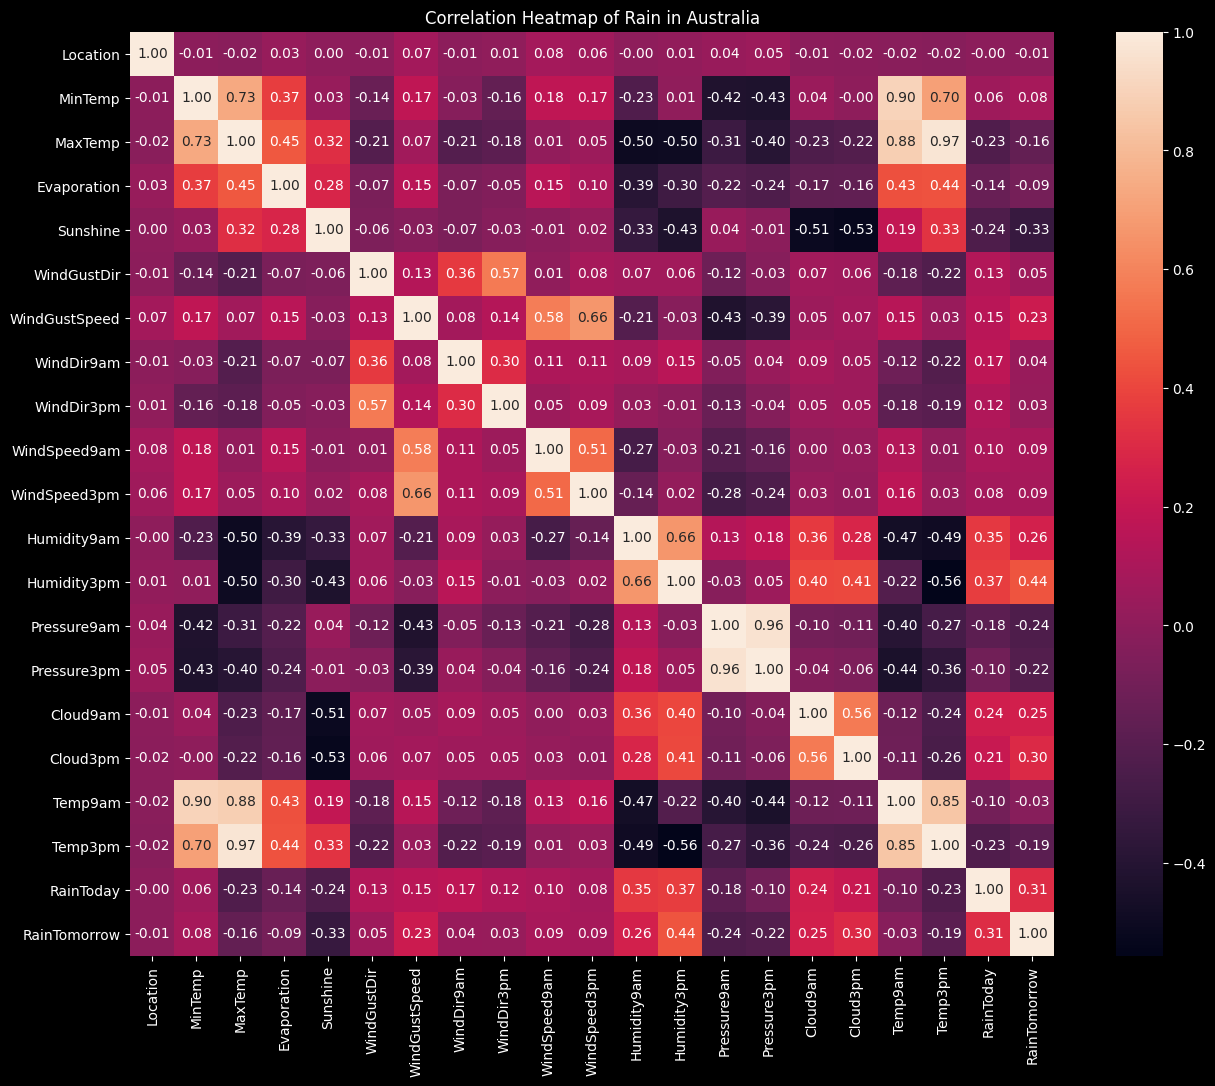

In [51]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia')
ax = sns.heatmap(df_encoded.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels())           
plt.show()

Berdasarkan correlation heatmap di atas terdapat 6 atribut yang mempunyai hubungan paling baik dengan RainTomorrow, yaitu:
- Humidity3pm
- RainToday
- Cloud3pm
- Humidity9am
- Cloud9am
- WindGustSpeed

In [52]:
df_feature = df_encoded.drop(columns=['Location', 'MinTemp', 'MaxTemp', 'Evaporation', 
                                        'Sunshine', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
                                        'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am',
                                        'Pressure3pm', 'Temp9am', 'Temp3pm'])
df_feature.columns

Index(['WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

Membagi data dengan perbandingan 7 : 3, 7 untuk training data dan 3 untuk test data.

In [53]:
# Split dataset into training set and test set
X = df_feature.drop(columns=['RainTomorrow'])
y = df_feature.RainTomorrow
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) # 70% training and 30% test

In [54]:
print('{0:0.2f}% ada pada training set'.format((len(X_train)/len(df_feature.index)) * 100.0))
print('{0:0.2f}% ada pada test set'.format((len(X_test)/len(df_feature.index)) * 100.0))

70.00% ada pada training set
30.00% ada pada test set


In [55]:
print("Jumlah Original RainTomorrow Yes : {0} ({1:2.2f}%)".format(len(df_feature.loc[df_feature['RainTomorrow'] == 1]), (len(df_feature.loc[df_feature['RainTomorrow'] == 1])/len(df_feature.index) * 100.0)))
print("Jumlah Original RainTomorrow No : {0} ({1:2.2f}%)".format(len(df_feature.loc[df_feature['RainTomorrow'] == 0]), (len(df_feature.loc[df_feature['RainTomorrow'] == 0])/len(df_feature.index) * 100.0)))

print('Training True : {0} ({1:2.2f}%)'.format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print('Training False : {0} ({1:2.2f}%)'.format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)* 100.0)))
print('Testing True : {0} ({1:2.2f}%)'.format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print('Testing False : {0} ({1:2.2f}%)'.format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Jumlah Original RainTomorrow Yes : 31199 (22.17%)
Jumlah Original RainTomorrow No : 109532 (77.83%)
Training True : 21826 (22.16%)
Training False : 76685 (77.84%)
Testing True : 9373 (22.20%)
Testing False : 32847 (77.80%)


**Standardization** adalah proses mengubah data sedemikian rupa sehingga mean tiap kolom menjadi sama dengan nol, dan standard deviation tiap kolom adalah satu. Jika telah memutuskan untuk menstandarkan X_train, maka model yang diperoleh bergantung pada scaled data, jadi X_test harus diskalakan juga dengan instance StandardScaler yang sama. Dalam kasus ini, menggunakan `.transform()`, yang hanya mengubah argumen, tanpa menyesuaikan scaler.

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Pendefinisian Model

Membuat model Logistic Regression Classifier.

In [57]:
lgr = LogisticRegression()

Membuat model Support Vector Machines (SVM) Classifier.

In [93]:
svm = SVC(kernel='linear', probability=True)

## Pelatihan Model

Melatih model Logistic Regression.

In [94]:
lgr.fit(X_train, y_train)

LogisticRegression()

Melatih model Support Vector Machines (SVM).

In [95]:
svm.fit(X_train, y_train)

## Evaluasi Model

In [ ]:
y_pred_logistic_regression = lgr.predict(X_test)

In [ ]:
accuracy_score_logistic_regression = accuracy_score(y_test,y_pred_logistic_regression)
print('Akurasi untuk Logistic Regression: {:.4f}'.format(accuracy_score_logistic_regression))

Akurasi untuk Logistic Regression: 0.8362


In [ ]:
y_pred_svm = svm.predict(X_test)

In [ ]:
accuracy_score_svm = accuracy_score(y_test,y_pred_svm)
print('Akurasi untuk Support Vector Machine: {:.4f}'.format(accuracy_score_svm))

Akurasi untuk Support Vector Machine: 0.8373


Terlihat dari hasil di atas, bahwa algoritma Support Vector Machine mendapatkan hasil yang lebih tinggi dari Logistic Regression oleh karena itu kita akan menggunakan algoritma Support Vector Machine untuk memprediksi perkiraan hujan di Australia.

Memeriksa overfitting dan underfitting.

In [ ]:
# print the scores on training and test set

print('Training set score logistic regression: {:.4f}'.format(lgr.score(X_train, y_train)))

print('Test set score logistic regression: {:.4f}'.format(lgr.score(X_test, y_test)))

print('Training set score support vector machine: {:.4f}'.format(svm.score(X_train, y_train)))

print('Test set score support vector machine: {:.4f}'.format(svm.score(X_test, y_test)))

Training set score logistic regression: 0.8384
Test set score logistic regression: 0.8362
Training set score support vector machine: 0.8386
Test set score support vector machine: 0.8373


Skor akurasi training-set logistic regression adalah 0,8384 sedangkan akurasi test-set logistic regression menjadi 0,8362 dan skor akurasi training-set SVM adalah 0,8386 sedangkan akurasi test-set SVM menjadi 0,8373 . Kedua nilai pada masing-masing model cukup sebanding. Jadi, tidak ada masalah overfitting.  
Selanjutnya, bandingkan akurasi model dengan null accuracy.  
Jadi, akurasi model Logistik Regression dan SVM adalah 0,8362 dan 0.8373. Namun, kami tidak dapat mengatakan bahwa model kami sangat bagus berdasarkan akurasi di atas. Kita harus membandingkannya dengan null accuracy. Null accuracy adalah akurasi yang dapat dicapai dengan selalu memprediksi kelas yang paling sering muncul.  
Jadi, pertama-tama kita harus memeriksa distribusi kelas di set pengujian.

In [ ]:
y_test.value_counts()

0    32847
1     9373
Name: RainTomorrow, dtype: int64

Kita dapat melihat bahwa kemunculan kelas yang paling sering adalah 32847. Jadi, kita dapat menghitung akurasi nol dengan membagi 32847 dengan jumlah kemunculan.

In [ ]:
null_accuracy = (32847/(32847+9373))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7780


Kita dapat melihat bahwa skor akurasi model kita adalah 0,8373 tetapi skor akurasi nol adalah 0,7780. Jadi, kita dapat menyimpulkan bahwa model Support Vector Machine kita melakukan pekerjaan yang sangat baik dalam memprediksi label kelas.  
Confusion matrix adalah alat untuk meringkas kinerja algoritma klasifikasi. Confusion matrix akan memberi kita gambaran yang jelas tentang kinerja model klasifikasi dan jenis kesalahan yang dihasilkan oleh model tersebut. Ini memberi kita ringkasan prediksi yang benar dan salah yang dikelompokkan berdasarkan masing-masing kategori. Ringkasan disajikan dalam bentuk tabel.  
Empat jenis hasil dimungkinkan saat mengevaluasi kinerja model klasifikasi. Keempat hasil ini dijelaskan di bawah ini:
1. True Positives (TP) – True Positives terjadi ketika kita memprediksi sebuah pengamatan milik kelas tertentu dan pengamatan tersebut benar-benar milik kelas itu.
2. True Negatives (TN) – True Negatives terjadi ketika kita memprediksi observasi bukan milik kelas tertentu dan observasi sebenarnya bukan milik kelas itu.
3. Positif Palsu (FP) – Positif Palsu terjadi ketika kita memprediksi observasi milik kelas tertentu tetapi observasi sebenarnya bukan milik kelas itu. Jenis kesalahan ini disebut kesalahan Tipe I.
4. False Negatives (FN) – False Negatives terjadi ketika kita memprediksi observasi bukan milik kelas tertentu tetapi observasi sebenarnya milik kelas itu. Ini adalah kesalahan yang sangat serius dan disebut kesalahan Tipe II.

**Confusion Matrix Logistic Regression**

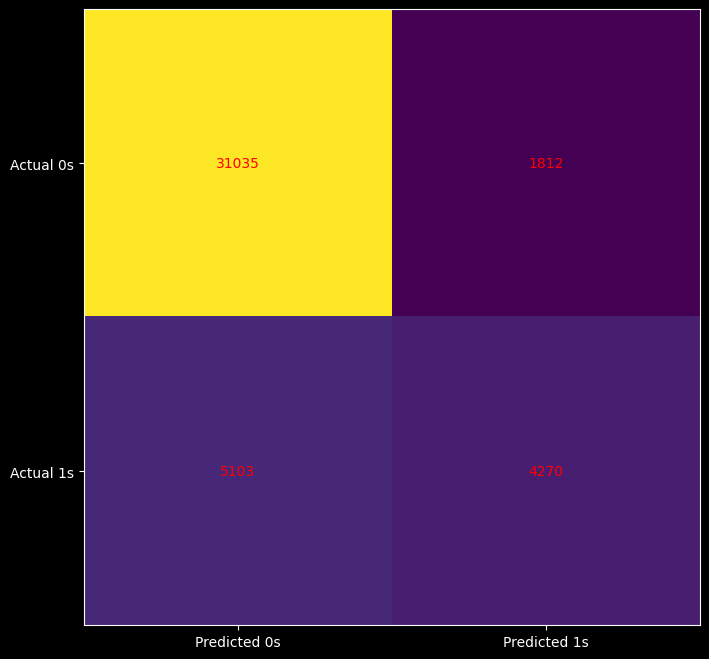

In [ ]:
logistic_regression_cm = confusion_matrix(y_test, y_pred_logistic_regression)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(logistic_regression_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, logistic_regression_cm[i, j], ha='center', va='center', color='red')
plt.show()

Confusion Matrix Logistic Regression menunjukkan 31035 + 1812 = 32847 prediksi benar dan 5103 + 4270 = 9373 prediksi salah.

**Confusion Matrix Support Vector Machine**

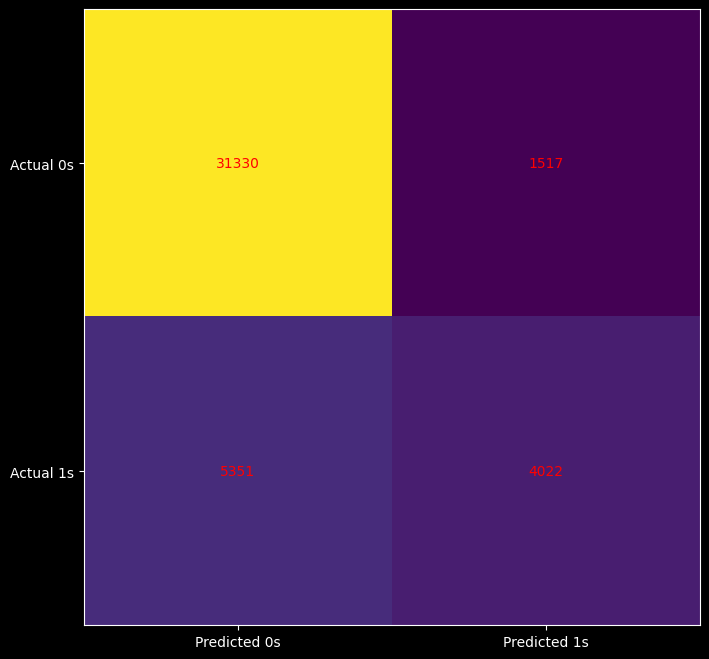

In [ ]:
svm_cm = confusion_matrix(y_test, y_pred_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(svm_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, svm_cm[i, j], ha='center', va='center', color='red')
plt.show()

Confusion Matrix Support Vector Machine menunjukkan 31330 + 1517 = 32847 prediksi benar dan 5351 + 4022 = 9373 prediksi salah.  
Classification report adalah cara lain untuk mengevaluasi kinerja model klasifikasi. Ini menampilkan skor precision, recall, f1-score, dan support untuk model tersebut.

**Classification Report Model Logistic Regression**

In [ ]:
print(classification_report(y_test, y_pred_logistic_regression))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     32847
           1       0.70      0.46      0.55      9373

    accuracy                           0.84     42220
   macro avg       0.78      0.70      0.73     42220
weighted avg       0.82      0.84      0.82     42220



**Classification Report Model Support Vector Machine**

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     32847
           1       0.73      0.43      0.54      9373

    accuracy                           0.84     42220
   macro avg       0.79      0.69      0.72     42220
weighted avg       0.83      0.84      0.82     42220



**Classification Accuracy dan Error Model Logistic Regression**

In [ ]:
TP_LGR = logistic_regression_cm[0,0]
TN_LGR= logistic_regression_cm[1,1]
FP_LGR = logistic_regression_cm[0,1]
FN_LGR = logistic_regression_cm[1,0]

classification_accuracy_lgr = (TP_LGR + TN_LGR) / float(TP_LGR + TN_LGR+ FP_LGR + FN_LGR)
classification_error_lgr = (FP_LGR + FN_LGR) / float(TP_LGR + TN_LGR+ FP_LGR + FN_LGR)

print('Classification accuracy LGR: {0:0.4f}'.format(classification_accuracy_lgr))
print('Classification error LGR: {0:0.4f}'.format(classification_error_lgr))

Classification accuracy LGR: 0.8362
Classification error LGR: 0.1638


**Classification Accuracy dan Error  Model Support Vector Machine**

In [ ]:
TP_SVM = svm_cm[0,0]
TN_SVM= svm_cm[1,1]
FP_SVM = svm_cm[0,1]
FN_SVM = svm_cm[1,0]

classification_accuracy_svm = (TP_SVM + TN_SVM) / float(TP_SVM + TN_SVM+ FP_SVM + FN_SVM)
classification_error_svm = (FP_SVM + FN_SVM) / float(TP_SVM + TN_SVM+ FP_SVM + FN_SVM)

print('Classification accuracy SVM: {0:0.4f}'.format(classification_accuracy_svm))
print('Classification error SVM: {0:0.4f}'.format(classification_error_svm))

Classification accuracy SVM: 0.8373
Classification error SVM: 0.1627


Precision dapat didefinisikan sebagai persentase hasil positif yang diprediksi dengan benar dari semua hasil positif yang diprediksi. Ini dapat diberikan sebagai rasio positif sejati (TP) dengan jumlah positif benar dan salah (TP + FP). Jadi, Precision mengidentifikasi proporsi hasil positif yang diprediksi dengan benar. Ini lebih mementingkan kelas positif daripada kelas negatif.  
Secara matematis, precision dapat didefinisikan sebagai rasio TP ke (TP + FP).

In [ ]:
precision_lgr = TP_LGR / float(TP_LGR + FP_LGR)
precision_svm = TP_SVM / float(TP_SVM + FP_SVM)


print('Precision Logistic Regression: {0:0.4f}'.format(precision_lgr))
print('Precision Support Vector Machines: {0:0.4f}'.format(precision_svm))

Precision Logistic Regression: 0.9448
Precision Support Vector Machines: 0.9538


Recall dapat didefinisikan sebagai persentase hasil positif yang diprediksi dengan benar dari semua hasil positif yang sebenarnya. Ini dapat diberikan sebagai rasio positif sejati (TP) dengan jumlah positif sejati dan negatif palsu (TP + FN). Recall juga disebut Sensitivy. Recall mengidentifikasi proporsi positif aktual yang diprediksi dengan benar.  
Secara matematis, Recall dapat diberikan sebagai rasio TP ke (TP + FN).

In [ ]:
recall_lgr = TP_LGR / float(TP_LGR + FN_LGR)
recall_svm = TP_SVM / float(TP_SVM + FN_SVM)

print('Recall or Sensitivity LGR: {0:0.4f}'.format(recall_lgr))
print('Recall or Sensitivity SVM: {0:0.4f}'.format(recall_svm))

Recall or Sensitivity LGR: 0.8588
Recall or Sensitivity SVM: 0.8541


## Model Inference

In [ ]:
''' data yang dibutuhkan pada model_inference
model_inference =
['WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm','RainToday']'''

model_inference = {
    'WindGustSpeed':[63.0, 42.0, 46.0, 31.0],
    'Humidity9am':[71.0, 44.0, 38.0, 89.0],
    'Humidity3pm':[22.0, 65.0, 30.0, 91.0],
    'Cloud9am':[8.0, 5.0, 5.0, 8.0],
    'Cloud3pm':[5.0, 5.0, 2.0, 8.0],
    'RainToday':[0, 0, 0, 1],
}

uji_data = pd.DataFrame(model_inference)

In [ ]:
sc = StandardScaler()
uji_data = sc.fit_transform(uji_data)

prediction = svm.predict(uji_data)
print("Support Virtual Machine Model = ", prediction)

Support Virtual Machine Model =  [0 0 0 1]


In [ ]:
print(round(df_feature.describe()),2)

       WindGustSpeed  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  RainToday  \
count       140731.0     140731.0     140731.0  140731.0  140731.0   140731.0   
mean            40.0         69.0         51.0       5.0       5.0        0.0   
std             13.0         19.0         21.0       2.0       2.0        0.0   
min              6.0          0.0          0.0       0.0       0.0        0.0   
25%             31.0         57.0         37.0       3.0       4.0        0.0   
50%             39.0         70.0         52.0       5.0       5.0        0.0   
75%             46.0         83.0         65.0       6.0       6.0        0.0   
max            135.0        100.0        100.0       9.0       9.0        1.0   

       RainTomorrow  
count      140731.0  
mean            0.0  
std             0.0  
min             0.0  
25%             0.0  
50%             0.0  
75%             0.0  
max             1.0   2


## Roc Curve

In [ ]:
# roc curve for models
from sklearn.metrics import roc_curve, roc_auc_score , auc

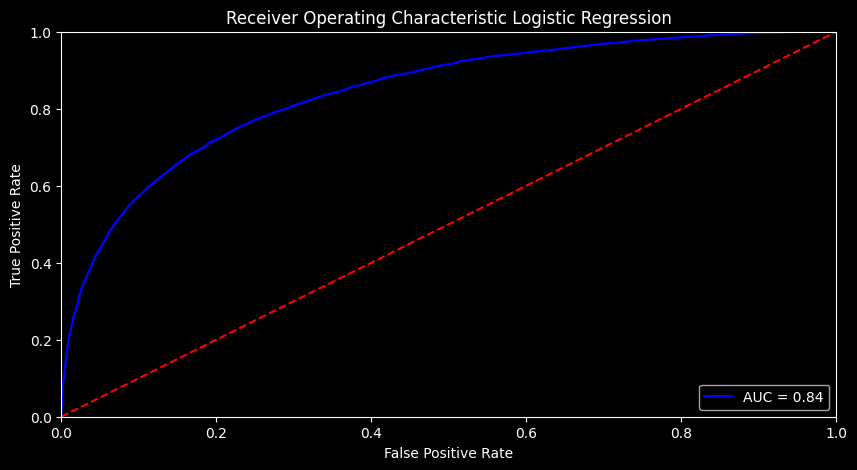

In [ ]:
# menampilkan grafik data menggunakan ROC AUC logistic regression
y_pred_prob_LR = lgr.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_LR)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic Logistic Regression')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
# menampilkan grafik data menggunakan ROC AUC SVM
y_pred_prob_SVM = svm.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_SVM)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic SVM')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()